In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/raw.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1001, 8)

*Dataset Information*

· gender : sex of students -> (Male/female)

· race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

· parental level of education : parents' final education ->(bachelor's degree,some college,master's
degree,associate's degree,high school)

. lunch : having lunch before test (standard or free/reduced)

· test preparation course : complete or not complete before test

. math score

. reading score

· writing score


DATACHECKS

. Check Missing values

· Check Duplicates

· Check data type

. Check the number of unique values of each column

. Check statistics of data set

· Check various categories present in the different categorical column



In [5]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1001 non-null   object
 1   race/ethnicity               1001 non-null   object
 2   parental level of education  1001 non-null   object
 3   lunch                        1001 non-null   object
 4   test preparation course      1001 non-null   object
 5   math score                   1001 non-null   int64 
 6   reading score                1001 non-null   int64 
 7   writing score                1001 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.7+ KB


In [8]:
df.nunique()

gender                          2
race/ethnicity                  6
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [9]:
df.describe()

,math score,reading score,writing score
count,1001.000000,1001.000000,1001.000000
mean,66.098901,69.185814,68.071928
std,15.158734,14.602583,15.198645
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
print("Categories in 'gender' variable:    ")
print(df['gender']. unique())
print()

print("Categories in 'race_ethnicity' variable: ")
print(df['race/ethnicity']. unique())
print()

print("Categories in'parental level of education' variable:")
print(df['parental level of education']. unique())
print()

print("Categories in 'lunch' variable:    ")
print(df['lunch'].unique())
print()

print("Categories in 'test preparation course' variable:    ")
print(df['test preparation course']. unique())


Categories in 'gender' variable:    
['female' 'male']

Categories in 'race_ethnicity' variable: 
['group B' 'group C' 'group A' 'group D' 'group E' 'group c']

Categories in'parental level of education' variable:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in 'lunch' variable:    
['standard' 'free/reduced']

Categories in 'test preparation course' variable:    
['none' 'completed']


In [15]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}' .format(len(numeric_features), numeric_features) )
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [17]:
df['total score' ] = df['math score'] + df['reading score' ] + df['writing score']
df['average' ] = df['total score' ]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading score'] == 100] ['average' ]. count()
writing_full = df[df['writing score'] == 100]['average']. count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


Visualization

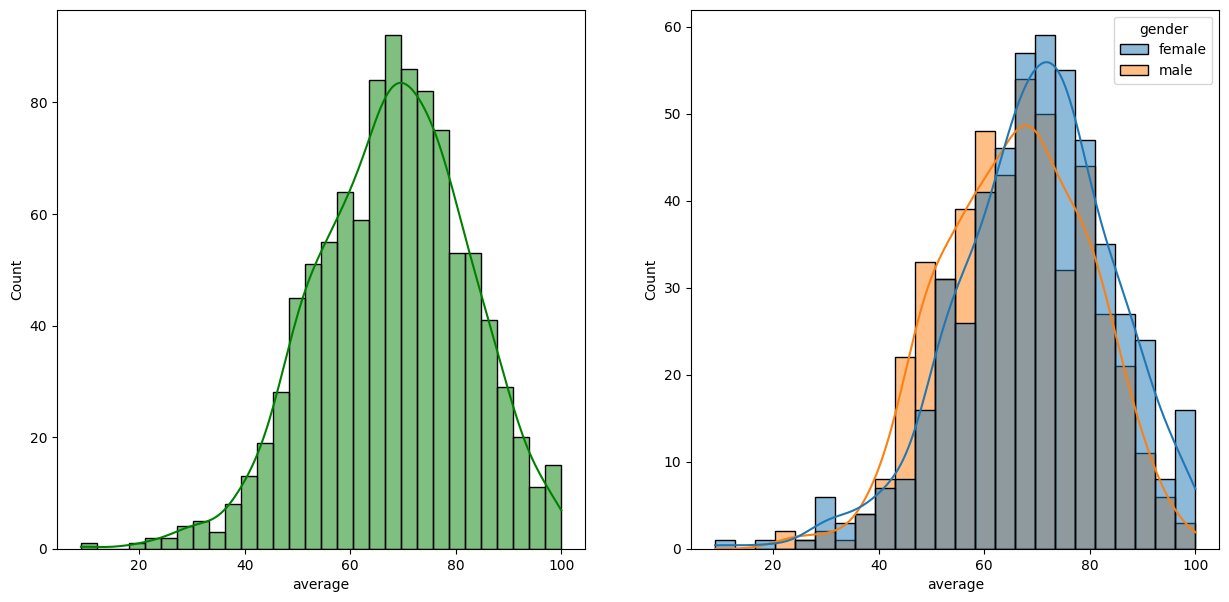

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average' ,kde=True,hue='gender')
plt.show()

insight
female student score better than male

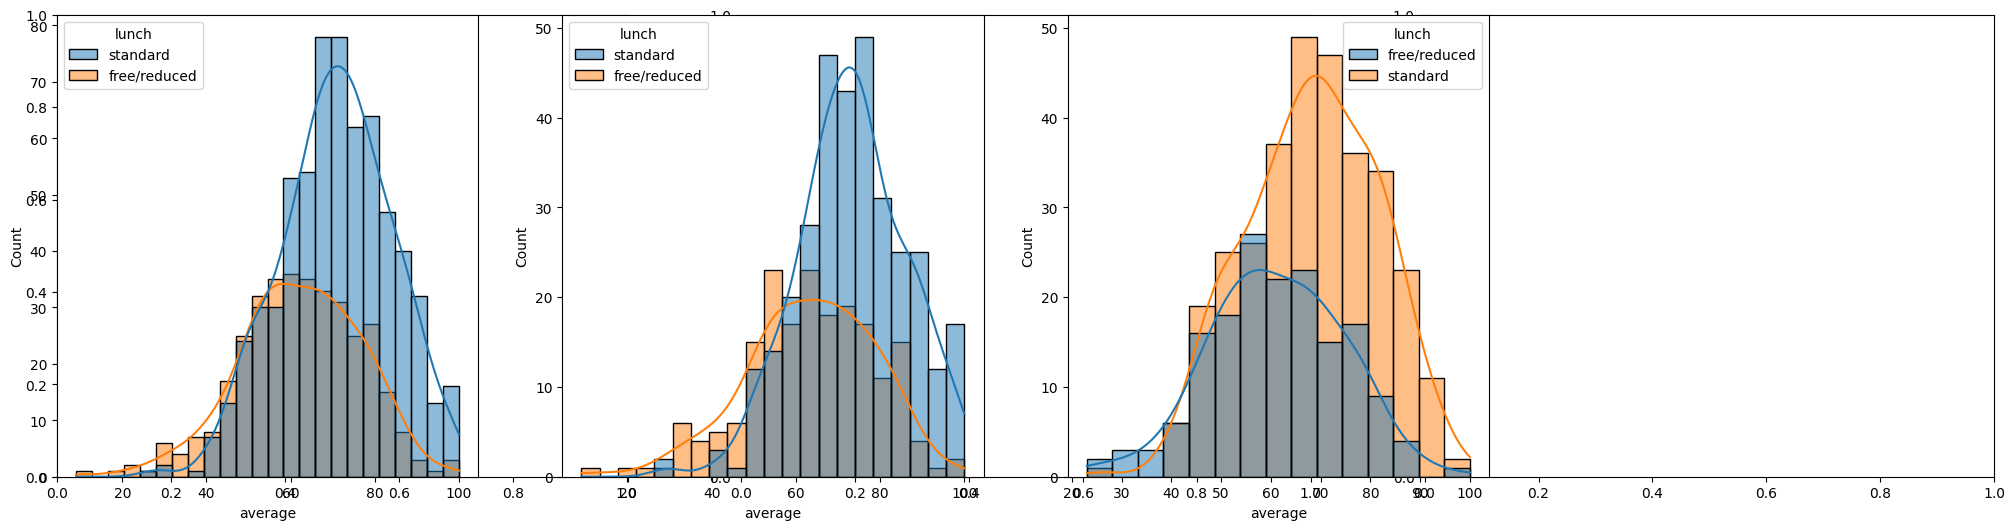

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female' ],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'],x='average',kde=True,hue='lunch')
plt.show()

insight: standard lunch helps to perform well in exams

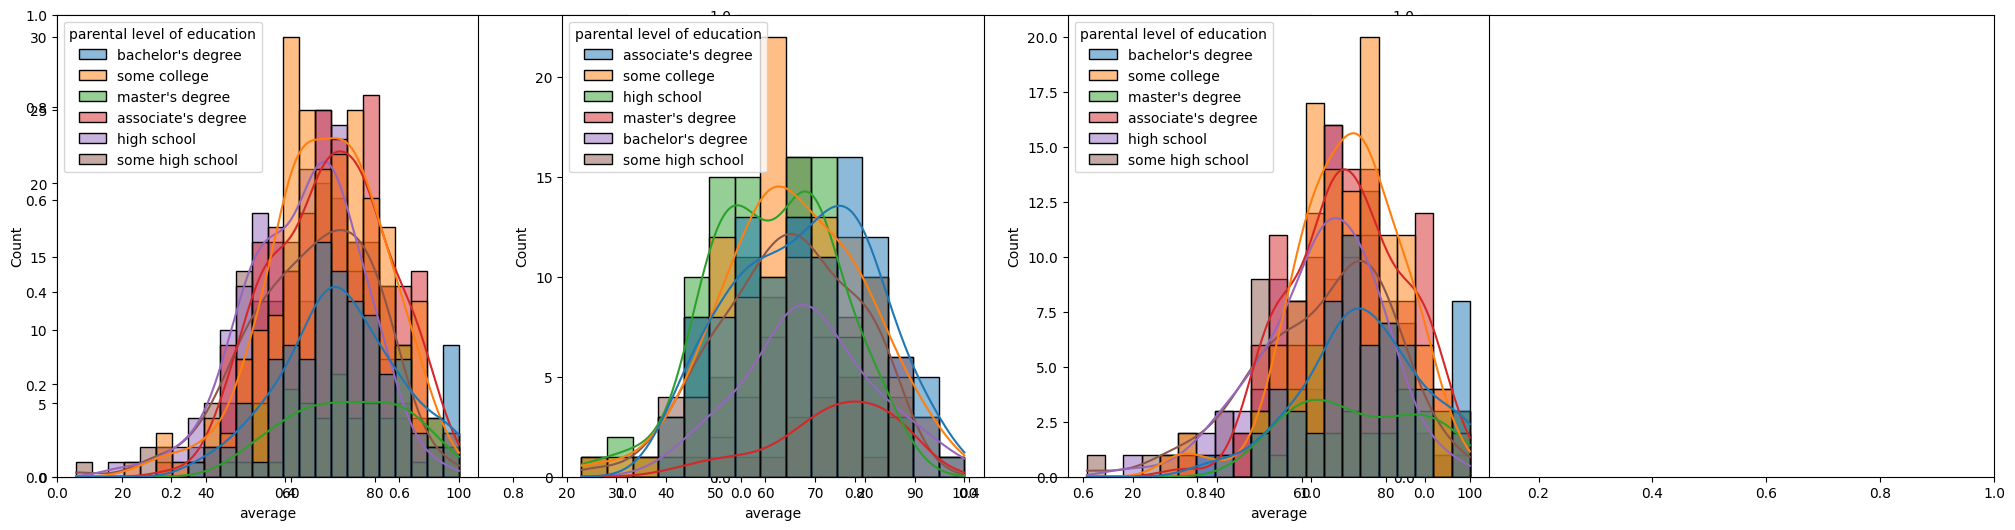

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average' ,kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender == 'male' ],x='average' ,kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender == 'female' ],x='average' ,kde=True, hue='parental level of education')
plt.show()

Insights

. In general parent's education don't help student perform well in exam.

. 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

. 3rd plot we can see there is no effect of parent's education on female students.

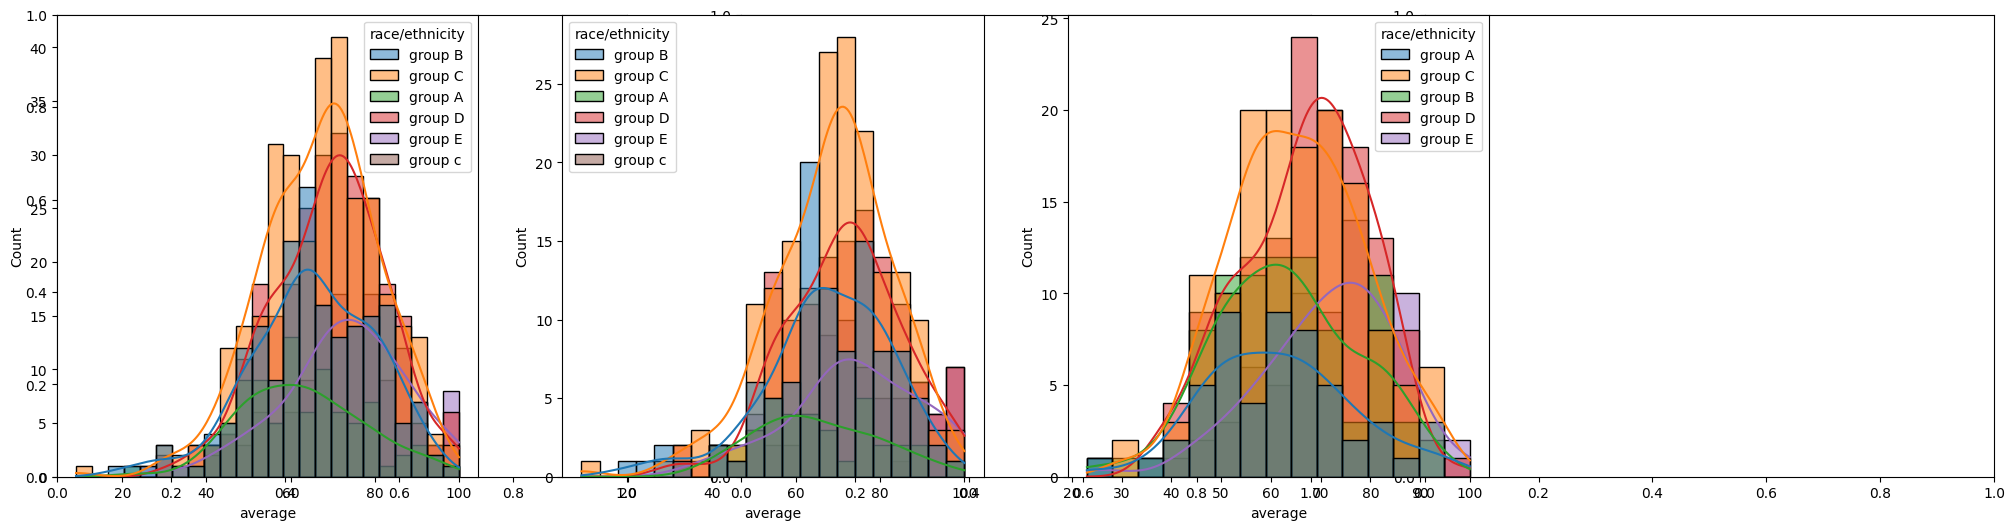

In [22]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average' ,kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender == 'female' ],x='average' ,kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender == 'male'],x='average' ,kde=True, hue='race/ethnicity')
plt.show()

Insights

. Students of group A and group B tends to perform poorly in exam.

. Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

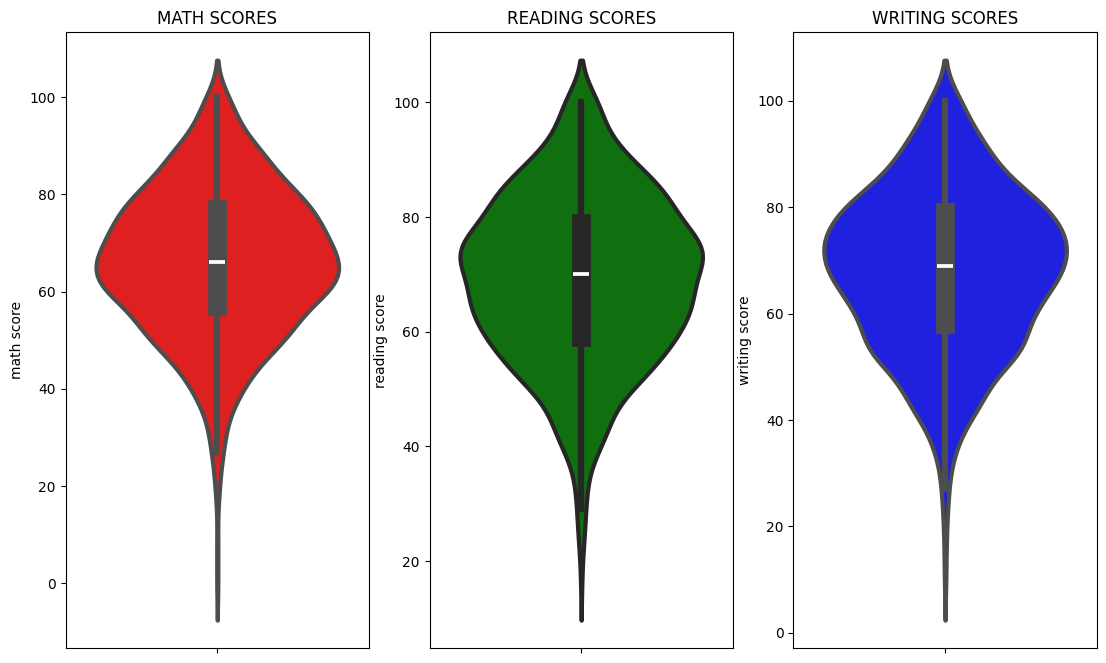

In [23]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df, color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

Insights

. From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in readir
50-80

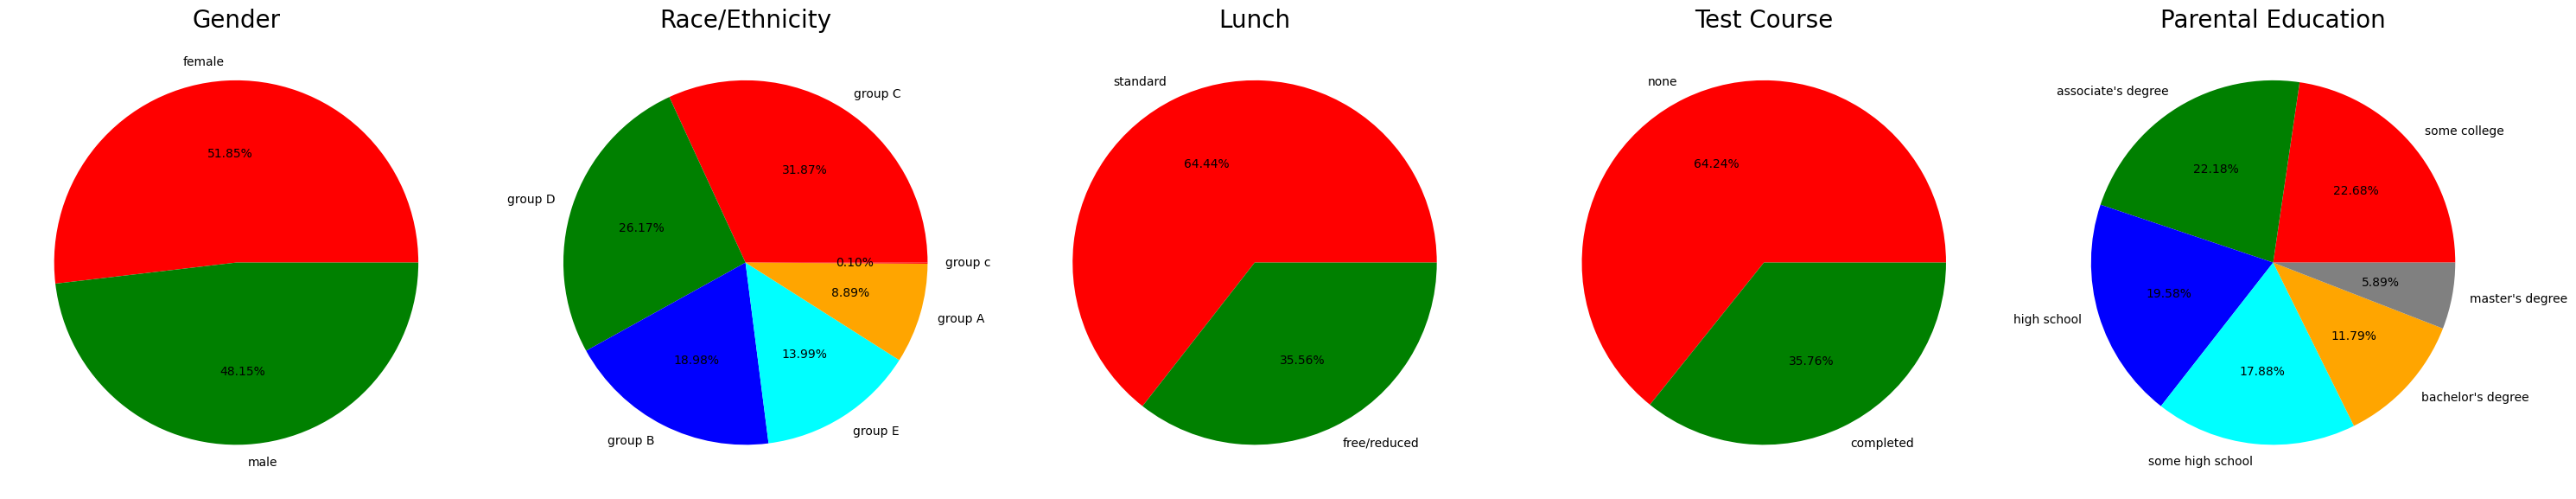

In [25]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = size.index
color = ['red','green']

plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = size.index
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = size.index
color = ['red','green']

plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = size.index
color = ['red','green']

plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Test Course', fontsize=20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = size.index
color = ['red', 'green', 'blue', 'cyan', 'orange', 'grey']

plt.pie(size, colors=color, labels=labels, autopct='%1.2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.show()

Insights

. Number of Male and Female students is almost equal

. Number students are greatest in Group C

. Number of students who have standard lunch are greater

. Number of students who have not enrolled in any test preparation course is greater

. Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

-------------------------------------
4.4 Feature Wise Visualization

4.4.1 GENDER COLUMN

. How is distribution of Gender ?
. Is gender has any impact on student's performance ?

UNIVARIATE ANALYSIS ( How is distribution of Gender ? )
+ Code

+ Markdow

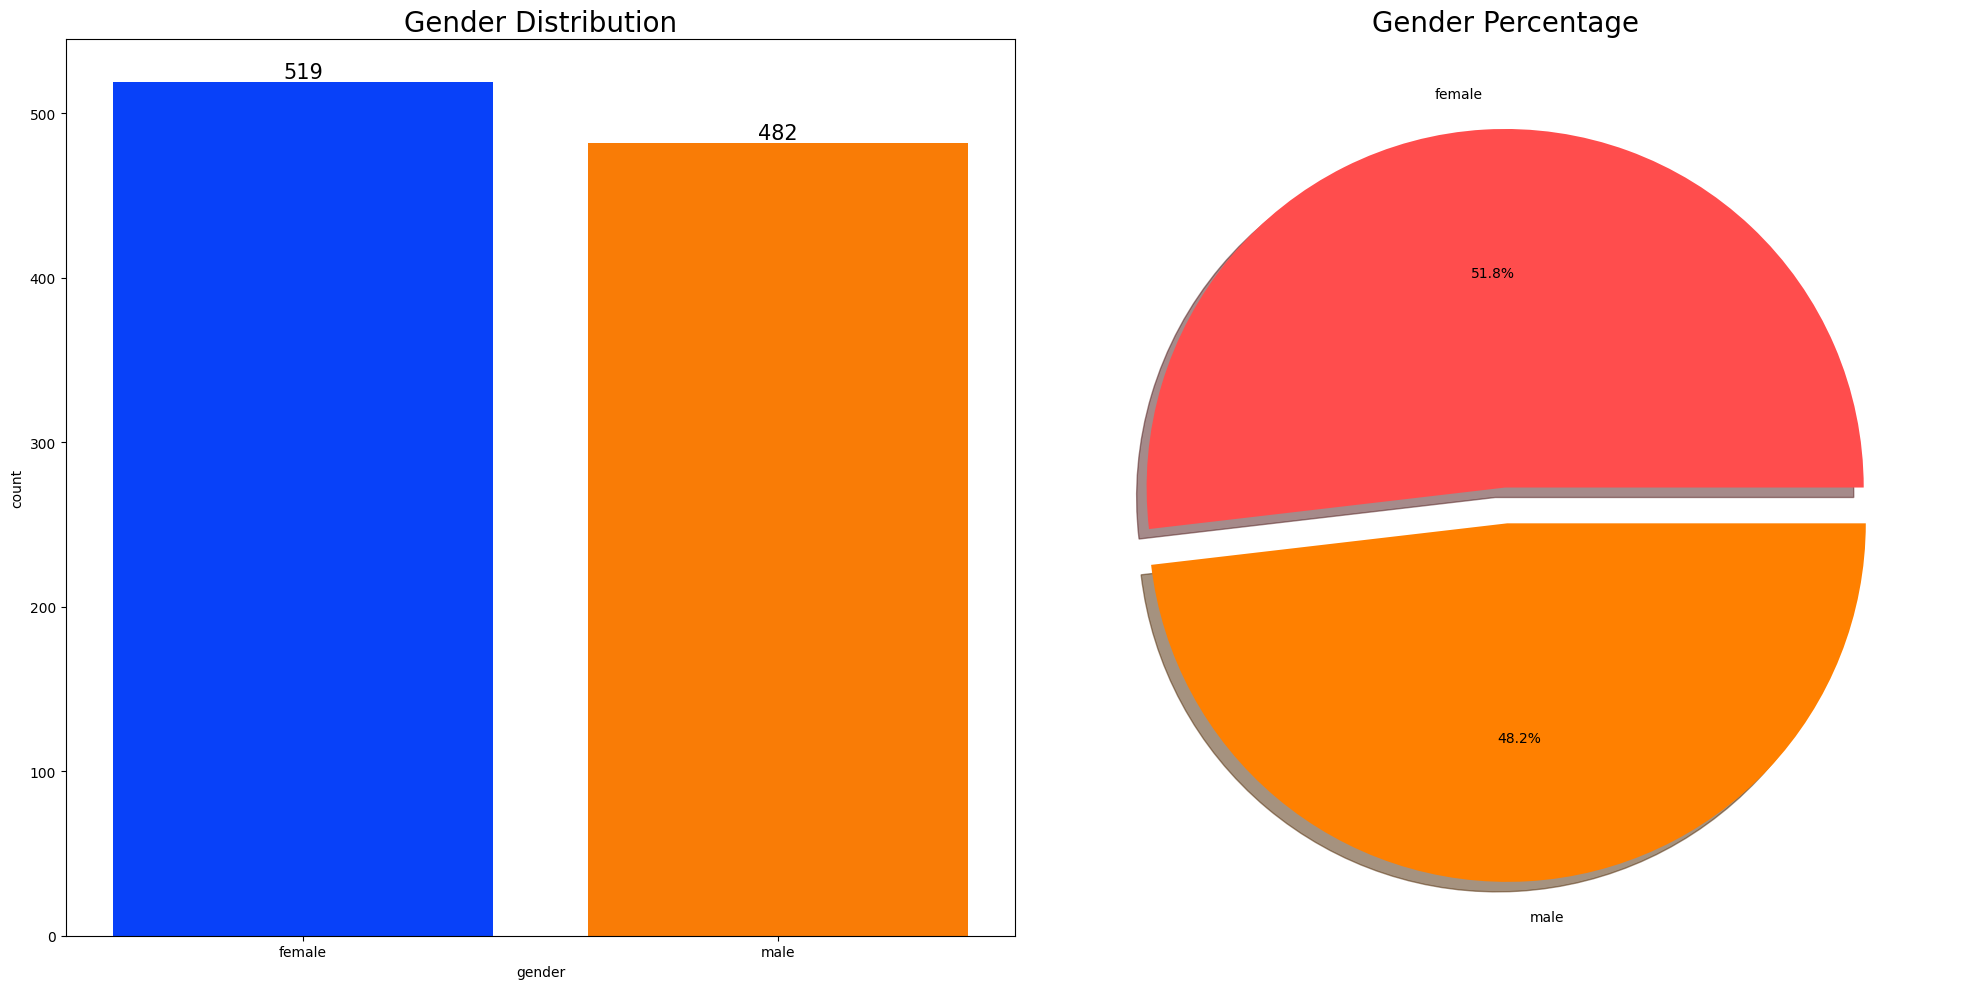

In [27]:

f, ax = plt.subplots(1, 2, figsize=(20, 10))

# ---- Countplot ----
sns.countplot(x='gender', data=df, palette='bright',
              ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

ax[0].set_title('Gender Distribution', fontsize=20)

# ---- Pie Chart ----
gender_counts = df['gender'].value_counts()

ax[1].pie(
    x=gender_counts,
    labels=gender_counts.index,
    explode=[0, 0.1],
    autopct='%1.1f%%',
    shadow=True,
    colors=['#ff4d4d', '#ff8000']
)

ax[1].set_title('Gender Percentage', fontsize=20)

plt.tight_layout()
plt.show()

Insights

. Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? )

In [29]:
gender_group = df.groupby('gender').mean(numeric_only=True)
gender_group


,math score,reading score,writing score,total score,average
gender,,,,,
female,63.657033,72.633911,72.493256,208.784200,69.594733
male,68.728216,65.473029,63.311203,197.512448,65.837483


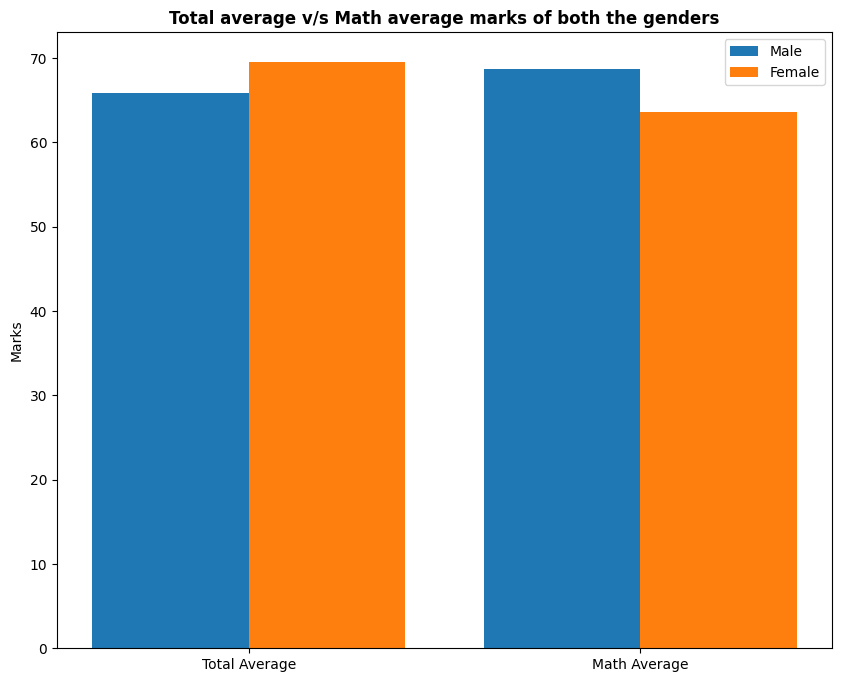

In [30]:

plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average' ]

female_scores = [gender_group['average' ][0], gender_group['math score'][0]]
male_scores = [gender_group['average' ][1], gender_group['math score' ] [1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()